In [8]:
from funcoes_ZDT4 import *
import numpy as np

In [15]:
TAMANHO_POPULACAO = 150
NUM_VARIAVEIS = 2
RESTRICOES = [0, 1, -5, 5]
NUM_GERACOES = 200

CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.1
CHANCE_DE_MUTACAO_GENE = 0.1

### CRIANDO O NSGA2

In [16]:
# Passo 1: inicializar uma população aleatória P
populacao_p = cria_populacao(TAMANHO_POPULACAO,*RESTRICOES, NUM_VARIAVEIS)

In [17]:
for t in range(NUM_GERACOES):
   
     ## FITNESS DOS INDIVIDUOS EM P
    rank_inicial, todas_as_frentes = fast_non_dominated_sort(populacao_p)
    rank_geral = aplica_elitismo(rank_inicial, todas_as_frentes)
    ## SELEÇÃO DOS INDIVIDUOS EM P
    selecionados = torneio_binario(rank_geral)
    
    # Passo 2: gerar uma população Q descendente de P
    populacao_q = []
    ## CRUZAMENTO COM INDIVIDUOS DE P GERA INDIVIDUOS DE Q
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamento_blx_alpha(pai, mae, CHANCE_DE_CRUZAMENTO, *RESTRICOES)
        populacao_q.append(individuo1)
        populacao_q.append(individuo2)
    ## MUTAÇÕES NOS INDIVIDUOS DE Q
    mutacao_sucessiva_ZDT4(populacao_q, CHANCE_DE_MUTACAO, CHANCE_DE_MUTACAO_GENE, *RESTRICOES)

    # Passo 3: criar uma população R = P + Q
    populacao_r = populacao_p.copy() + populacao_q.copy()

    # Passo 4: rankear a população R
    rank_inicial_r, todas_as_frentes_r = fast_non_dominated_sort(populacao_r)
    rank_geral_r = aplica_elitismo(rank_inicial_r, todas_as_frentes_r)
    # Passo 5: criar a próxima geração
    proxima_geracao = []
    
    i = 0
    tamanho_proxima_geracao = len(proxima_geracao)
    while tamanho_proxima_geracao <= TAMANHO_POPULACAO:

        frente = todas_as_frentes_r[0]
        proxima_geracao += frente

        tamanho_proxima_geracao = len(proxima_geracao)
        i += 1


    # Passo 6: calcular crowding-distance da frente
    distancias, f_o = distancia_de_aglomeracao(frente)

    # Passo 7: ordenar individuos de acordo com a crowding distance
    ordenador = list(zip(distancias, f_o))
    ordenador = sorted(ordenador, key = lambda item: item[0])
    distancias_em_ordem, f_o_em_ordem = zip(*ordenador)

    # Passo 8: remover quantos individuos forem necessários para a próxima geração ter o tamanho da população
    num_rejeitados = len(proxima_geracao) - TAMANHO_POPULACAO
    for j in range(num_rejeitados):
        rejeitado = f_o_em_ordem[j][0]
        proxima_geracao.remove(rejeitado)
        
    # Passo 9: atualizar a população P com a próxima geração
    populacao_p = proxima_geracao
    
    
    rank_inicial = c.deepcopy(rank_inicial)
    rank_geral = c.deepcopy(rank_geral)
    rank_inicial_r = c.deepcopy(rank_inicial_r)
    rank_geral_r = c.deepcopy(rank_geral_r)

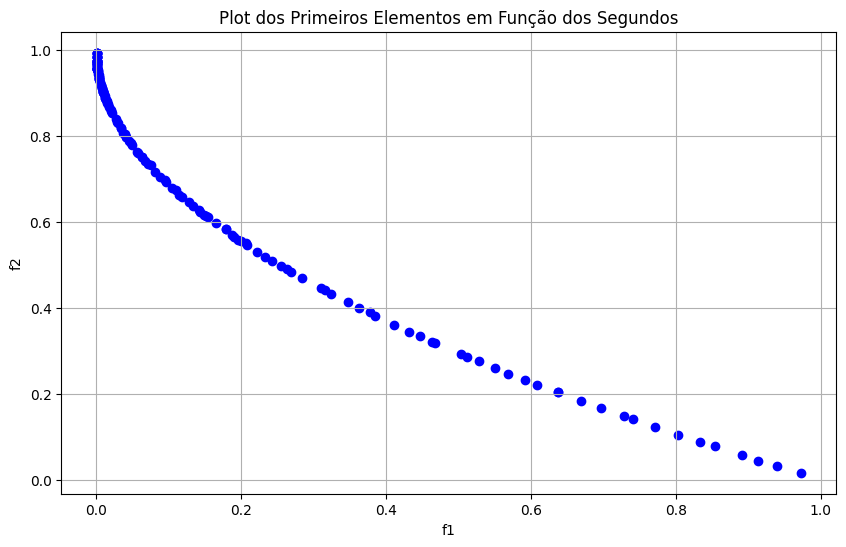

In [18]:
import matplotlib.pyplot as plt

data = funcoes_objetivo_populacao(populacao_p)
o1 = [par[0] for par in data]
o2 = [par[1] for par in data]

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.scatter(o1, o2, color='blue')
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Plot dos Primeiros Elementos em Função dos Segundos')
plt.grid(True)
plt.show()
